# Introduction to Scikit-learn (Sklearn)

This notebook demonstrates some of the most usefull function of the beautiful Scikit-learn library.

What we're going to cover:

0. An end-to-end Scikit-learn workflow
01. Getting the data read
02. Choose the right estimator/algorithm for our problems
03. Fit the model/algorithm and use it make predictions on our data
04. Evaluating a model
05. Improve a model
06. Save and load a trained model
07. Putting it all together

In [1]:
# Standard imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline

## 0. End to end scikit-learn workflow

In [2]:
# Let's listify the contents
what_were_covering=[
"0. An end-to-end Scikit-learn workflow",
"01. Getting the data read",
"02. Choose the right estimator/algorithm for our problems",
"03. Fit the model/algorithm and use it make predictions on our data",
"04. Evaluating a model",
"05. Improve a model",
"06. Save and load a trained model",
"07. Putting it all together"]

In [3]:
# 1. Get the data readyimport pandas as pd
heart_disease =pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
#import warnings
#warnings.filterwarnings("ignore") # default

In [5]:
# Create X (features matrix)
X = heart_disease.drop(["target"], axis=1)

# Create y (labels)
y=heart_disease.target

In [6]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
# clf.get_params()

In [7]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
clf.fit(X_train,y_train);

In [9]:
# Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [10]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [43]:
clf.score(X_test, y_test)

0.8852459016393442

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



In [45]:
confusion_matrix(y_test, y_preds)

array([[26,  4],
       [ 3, 28]], dtype=int64)

In [46]:
accuracy_score(y_test,y_preds)

0.8852459016393442

In [47]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)

for i in range(10,100,10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) *100:.2f}%")
    print("")

Trying model with 10 estimators..
Model accuracy on test set: 78.69%

Trying model with 20 estimators..
Model accuracy on test set: 85.25%

Trying model with 30 estimators..
Model accuracy on test set: 81.97%

Trying model with 40 estimators..
Model accuracy on test set: 86.89%

Trying model with 50 estimators..
Model accuracy on test set: 83.61%

Trying model with 60 estimators..
Model accuracy on test set: 83.61%

Trying model with 70 estimators..
Model accuracy on test set: 81.97%

Trying model with 80 estimators..
Model accuracy on test set: 86.89%

Trying model with 90 estimators..
Model accuracy on test set: 80.33%



In [48]:
# 6. Save a model and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [49]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test, y_test)

0.8032786885245902

In [50]:
#import sklearn
#sklearn.show_versions()

In [51]:
what_were_covering

['0. An end-to-end Scikit-learn workflow',
 '01. Getting the data read',
 '02. Choose the right estimator/algorithm for our problems',
 '03. Fit the model/algorithm and use it make predictions on our data',
 '04. Evaluating a model',
 '05. Improve a model',
 '06. Save and load a trained model',
 '07. Putting it all together']

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels (usually `X` and `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [52]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [54]:
y = heart_disease.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [55]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

In [57]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [58]:
len(car_sales)

1000

In [59]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [60]:
car_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Odometer (KM),1000.0,131073.708,68859.723885,10148.0,71238.0,131202.0,192372.75,249860.0
Doors,1000.0,4.014,0.379405,3.0,4.0,4.0,4.00,5.0
Price,1000.0,16045.665,8630.794219,2796.0,9481.5,14264.0,20738.75,52458.0


In [61]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [62]:
# split into X/y
X = car_sales.drop("Price", axis=1)
y= car_sales.Price

# Split into training and test
X_train, x_test, y_train, y_test =train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   random_state=42)

In [63]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [64]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot,categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [65]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [66]:
# Dummies
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies


,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [67]:
# Let's refit the model
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [68]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some values (also know as imputation).
2. Remove the samples with missing data altogether.


In [72]:
# Import car sales missing data

car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [73]:
car_sales_missing.tail()

,Make,Colour,Odometer (KM),Doors,Price
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0
999,Toyota,Blue,248360.0,4.0,12732.0


In [75]:
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [76]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [83]:
# Create X and y
X= car_sales_missing.drop(columns="Price", axis=1)
y= car_sales_missing.Price

In [86]:
# Let's try convert our data to numbers
# dummmies_car_sales_missing = pd.get_dummies(car_sales_missing[["Make","Colour","Doors"]])
# dummmies_car_sales_missing

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option 1: Fill missing data with pandas

In [88]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace = True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace= True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace = True)

In [89]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [90]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [91]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [92]:
len(car_sales_missing)

950

In [93]:
# Assign X/y again with filled NaN dataframe
X = car_sales_missing.drop("Price", axis=1)
y= car_sales_missing.Price

In [95]:
# Let's try convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [96]:
dummmies_car_sales_missing = pd.get_dummies(car_sales_missing[["Make","Colour","Doors"]])
dummmies_car_sales_missing

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing
0,4.0,0,1,0,0,0,0,0,0,0,1,0
1,5.0,1,0,0,0,0,0,1,0,0,0,0
2,4.0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,0,0,0,1,0,0,0,0,0,1,0
4,3.0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,0,0,0,1,0,1,0,0,0,0,0
996,3.0,0,0,0,0,1,0,0,0,0,1,0
997,4.0,0,0,1,0,0,0,1,0,0,0,0
998,4.0,0,1,0,0,0,0,0,0,0,1,0


#### Option 2: Fill missing values with Scikit-learn

In [98]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [99]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [100]:
car_sales_missing.dropna(subset=["Price"], inplace= True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [101]:
# Split X/ y
X= car_sales_missing.drop('Price', axis=1)
y= car_sales_missing.Price

In [102]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [104]:
# Fill missing values with Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill Categorical values with 'missing'
# Fill Numerical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
numerical_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features =["Odometer (KM)"]

# Create an imputer (Something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer,door_feature),
    ("numerical_imputer",numerical_imputer,num_features)
])

# Transform the data

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [105]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [106]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [107]:
# Let's try convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [108]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)
                                                    

0.21990196728583944

**Note:** 
The 50 less values in the transformed data is because we dropped the rows (50 total) with missing values in Price column.

In [109]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Choosing the right estimator/algroithm for your problem

Somethings to note:

* Sklearn refer to machine learning models, algrothms as estimators.
* Classification problem - Predicting a category (Heart disease or not)
    *  Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - Predicting a number (selling price of a car)
    
If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map. - https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset.- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [4]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [29]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [31]:
housing_df= housing_df.drop("MedHouseVal", axis=1)

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
housing_df

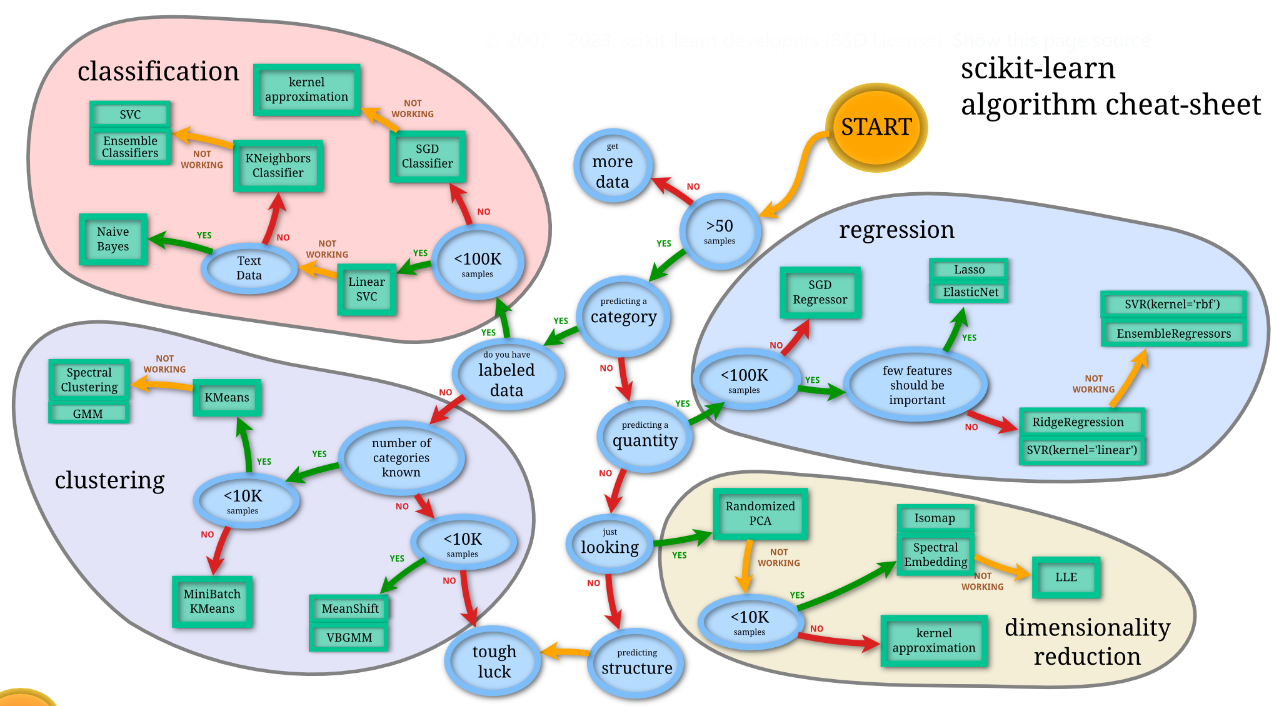

In [ ]:
# Import algorithm/ estimator
from sklearn.linear_model import Ridge


# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target",axis=1)
y = housing_df.target #median house price in $100,00s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check score of the model (on the test set)
model.score(X_test, y_test)


What if `Ridge` didn't work or the score didn't fit our needs?

Well, we could always try different model.

How about we try ensemble model (an ensemble is combination of smaller models to try and make better predictions than just a single model)?

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [10]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup radom seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y=housing_df.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train,y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)


0.8065734772187598

### 2.2 Picking a machine learning model for a classification problem

Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [125]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [126]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`.

In [130]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)


C:\Users\Phuong Ta\desktop\ml-course\exercise_ds\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [131]:
heart_disease.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [144]:
# Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis= 1)
y = heart_disease.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=1000)
clf.fit(X_train, y_train)

# Evaluate the RanRandom Forest Classifier
clf.score(X_test, y_test)

0.8688524590163934

Tidbit:
1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it make predictions

### 3.1 Fitting the model to the data

Different names for
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [143]:
# Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis= 1)
y = heart_disease.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the model to the data (training the machine learning)
clf.fit(X_train, y_train)

# Evaluate the RanRandom Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8688524590163934

In [141]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Random Forest model deep dive

These resources will help you understand what's happening inside the Random Forest models we've been using.

* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forest Wikipedia (simple version)](https://simple.wikipedia.org/wiki/Random_forest)
* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

### 3.2 Make predictions using a machine learning model.

2 ways to make predictions:

1. `predict()`
2. `predict_proba()`

In [145]:
# Use a train model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [147]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [149]:
# Compare predictions to truth labels to evaluate the mode
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [150]:
clf.score(X_test, y_test)

0.8688524590163934

In [151]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

Make prediction with `predict_proba()`

In [154]:
# predict_proba() return probabilities of a classification label
clf.predict_proba(X_test[:5])


array([[0.905, 0.095],
       [0.4  , 0.6  ],
       [0.49 , 0.51 ],
       [0.868, 0.132],
       [0.208, 0.792]])

In [155]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models

In [156]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [158]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y= housing_df.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions 
y_preds = model.predict(X_test)

In [159]:
y_preds[:10]

array([0.5095   , 0.74161  , 4.9232571, 2.52961  , 2.27369  , 1.64692  ,
       2.37605  , 1.66932  , 2.7729706, 4.9134589])

In [161]:
np.array(y_test[:10])

C:\Users\Phuong Ta\AppData\Local\Temp\ipykernel_16500\25245348.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  np.array(y_test[:10])


array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [162]:
len(y_preds), len(y_test)

(4128, 4128)

**Mean Absoute Error (MAE):** 

Được tính bằng cách lấy trung bình giá trị tuyệt đối của sự khác biệt giữa các giá trị dự đoán và các giá trị thực tế. Giá trị MAE càng nhỏ thì mô hình dự đoán càng chính xác.

In [163]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32754256845930246

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-learn models/estimators:

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score` method

In [166]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
X = heart_disease.drop('target', axis=1)
y= heart_disease.target

# Create Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

# Create classifier model instance
clf = RandomForestClassifier()

# Fit classifier to training data
clf.fit(X_train, y_train)

# Make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [169]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train,y_train)

1.0

In [170]:
clf.score(X_test, y_test)

0.8360655737704918

Let's use the score() on our regression problem...

In [174]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y= housing_df.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [179]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0

model.score(X_test, y_test)

0.8051230593157366

In [177]:
model.score(X_test, y_test)

0.8051230593157366

### 4.2 Evaluating a model using `scoring` parameter (cross_validation_score)

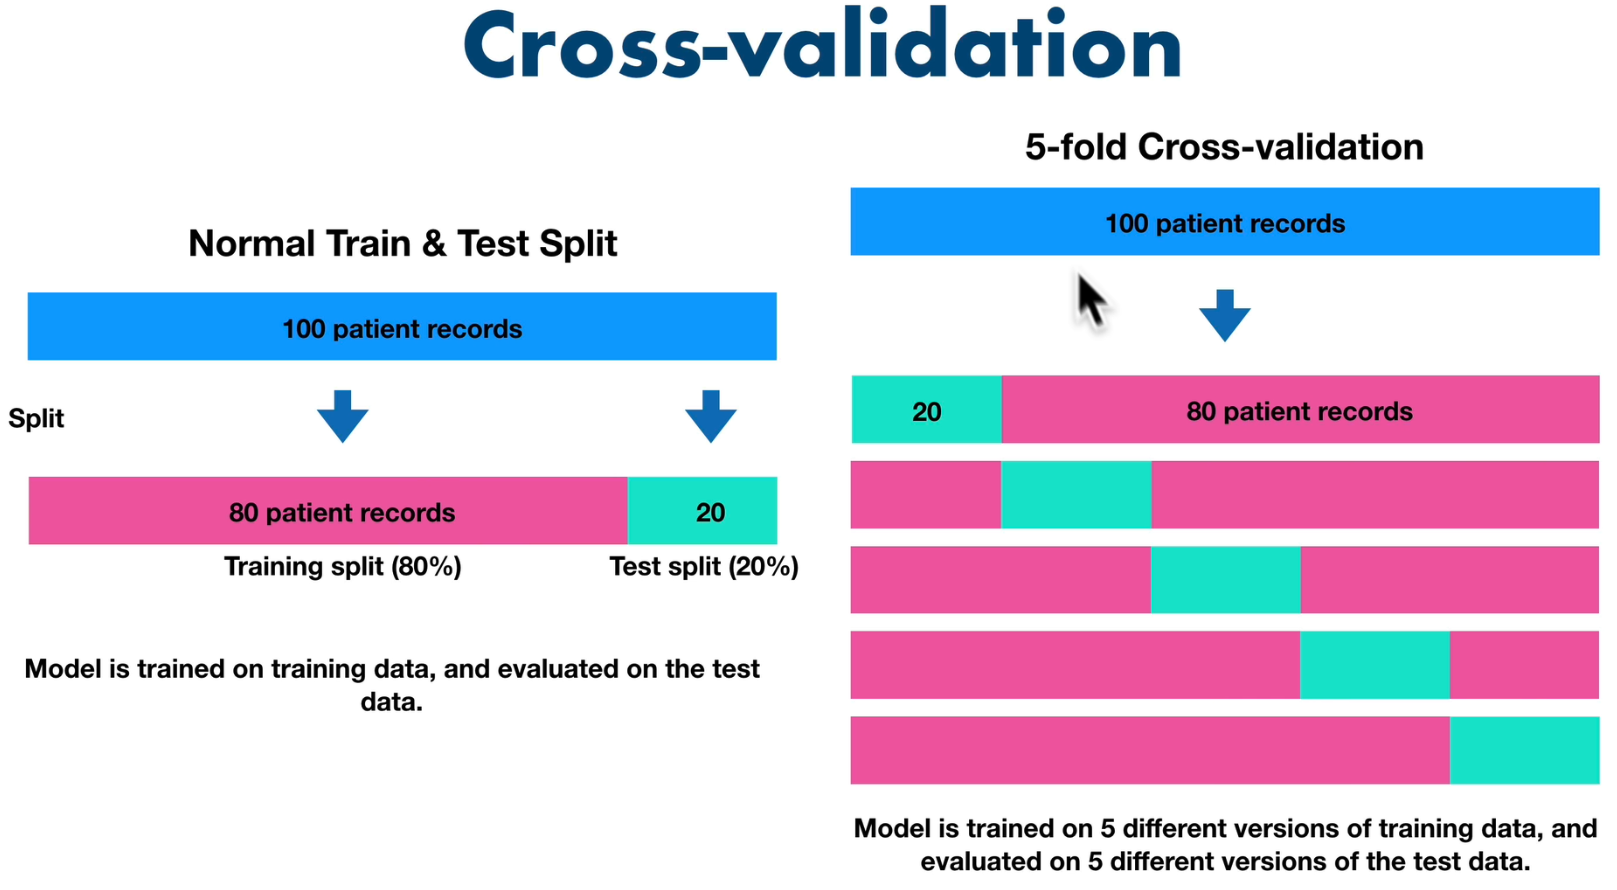

In [181]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);


In [182]:
clf.score(X_test, y_test)

0.8360655737704918

In [189]:
cvs = cross_val_score(clf, X, y, cv= 10)
cvs

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.83333333,
       0.83333333, 0.73333333, 0.83333333, 0.73333333, 0.83333333])

In [190]:
np.mean(cvs)

0.8312903225806452

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_validation_score = np.mean(cross_val_score(clf, X, y, cv=5))

#Using accuracy score
y_preds = clf.predict(X_test)

accuracy_sco = accuracy_score(y_test, y_preds)

# Compare the three
clf_single_score, clf_cross_validation_score, accuracy_sco

(0.8360655737704918, 0.8248087431693989, 0.8360655737704918)

We can see `accuracy_score = clr.score`

In [193]:
# Default scoring parameter of classifier = mean accuracy
clf.score(X_test, y_test)

0.8360655737704918

In [ ]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring= None)


#### Using bagging Classifier base estimator RandomForestClassifier

In [12]:
from sklearn.ensemble import BaggingClassifier
#from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease.target

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Bagging Classifier với 10 mô hình cây quyết định
bag_clf = BaggingClassifier(
    RandomForestClassifier(), n_estimators=10,
    max_samples=0.5, bootstrap=True, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
bag_clf.fit(X_train, y_train)

# Đánh giá độ chính xác của mô hình trên tập kiểm tra
y_pred = bag_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8688524590163934


#### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area Under ROC curve
3. Confusion matrix
4. Classification report


##### **Accuracy**

In [197]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease.target

clf= RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5, scoring=None)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [9]:
np.mean(cross_val_score)

0.8248087431693989

In [10]:
print(f"Hear Disease Classifier Cross Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Hear Disease Classifier Cross Validated Accuracy: 82.48%


##### **Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's True Positive Rate (TPR) versus a model False Positive Rate (FPR).

* True Positive = model predicts 1 when truth  is 1
* False Positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* Fasle Negative = model predicts 0 when truth is 1


In [11]:
# Create X_test,... etc
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [12]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [13]:
y_prob_positive = y_probs[:,1]
y_prob_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [14]:
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_prob_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

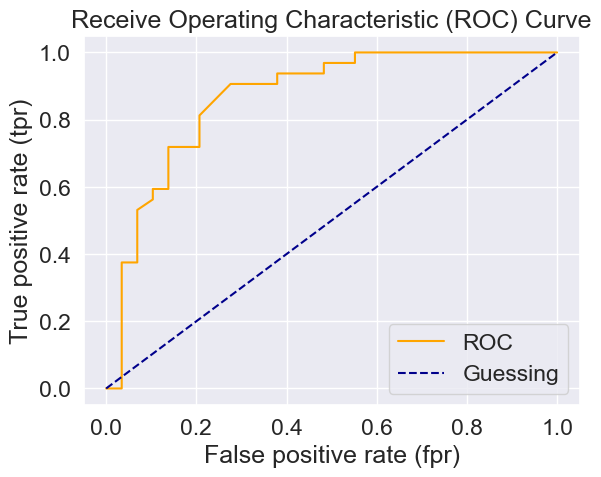

In [15]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
        Plots a ROC curve given the false positive rate (fpr)
        and true positive rate (tpr) of a model.
    """
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Cusomtize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receive Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [16]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob_positive)


0.8669181034482759

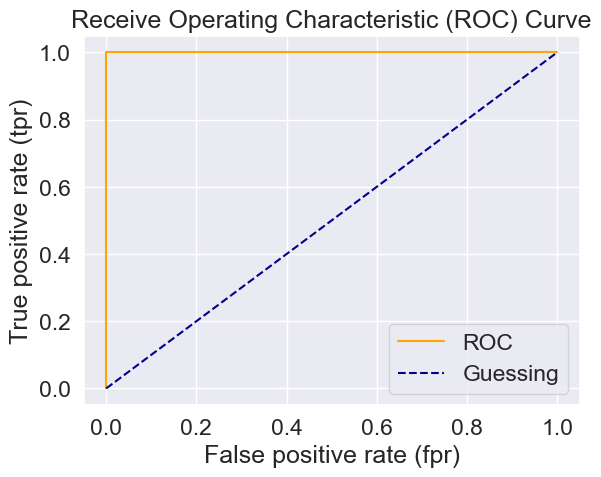

In [17]:
# Plot perfect ROC curve and AUC score
fpr, tpr, threholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

In [18]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

##### **Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [19]:
heart_disease.head(0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease.target

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [27]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,5,27


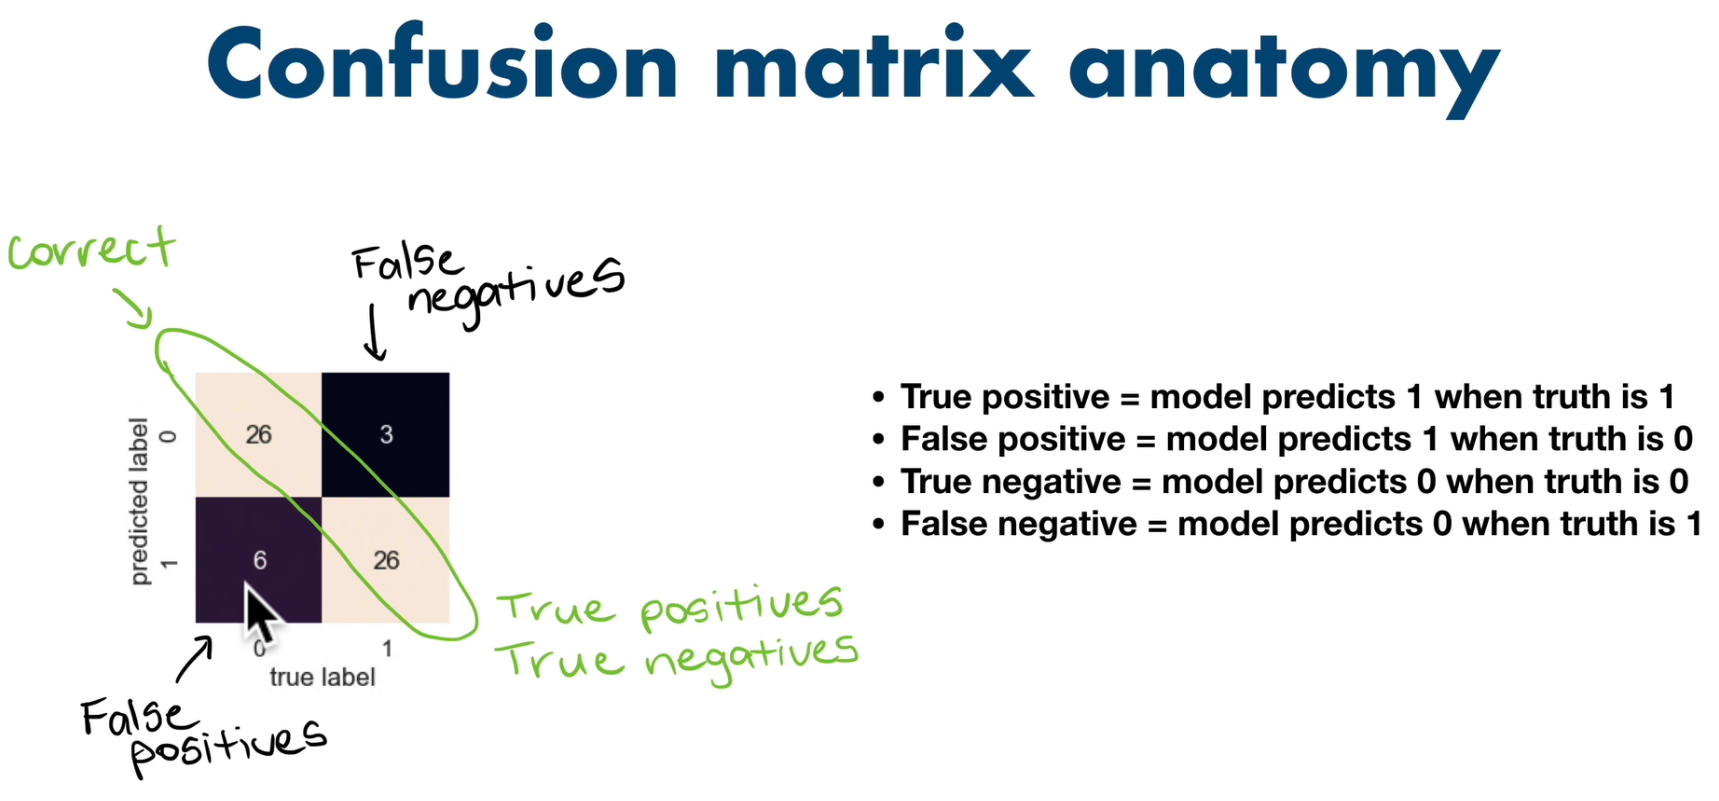

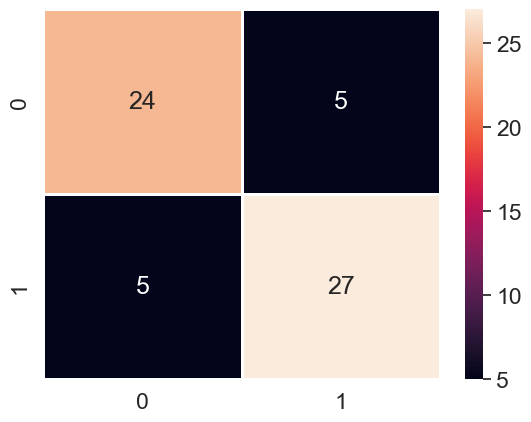

In [28]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat,
           cmap="rocket",
           annot=True,
           linewidths=1,
           linecolor="white");


##### **Confusion Matrix** - Using Scikit-learn

The next way to evaluate a classification model is by using a confusion matrix

A confusion matrix is a quick way to compare the lables a model predicts and the actual labels it was supposed to predict.

In essence, this give an idea of where the models is getting confused.

In [29]:
# See here for sklaern confusion matrix - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [30]:
# https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

pd.crosstab(y_test, y_preds,
            rownames= ["Actual Labels"],
            colnames= ["Predicted Labels"])


Predicted Labels,0,1
Actual Labels,,
0,24,5
1,5,27


**Creating a confusion matrix using Scikit-learn**

To use the new methods of creating confusion matrix with Scikit-learn, You will need sklearn version 1.0+ - https://scikit-learn.org/stable/install.html

You can read more about confusion matrix display here - https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#create-confusionmatrixdisplay

In [26]:
import sklearn
sklearn.__version__

'1.2.0'

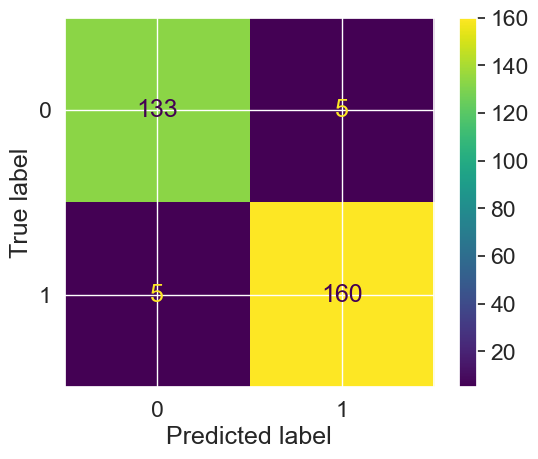

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,
                                     X=X,
                                     y=y)

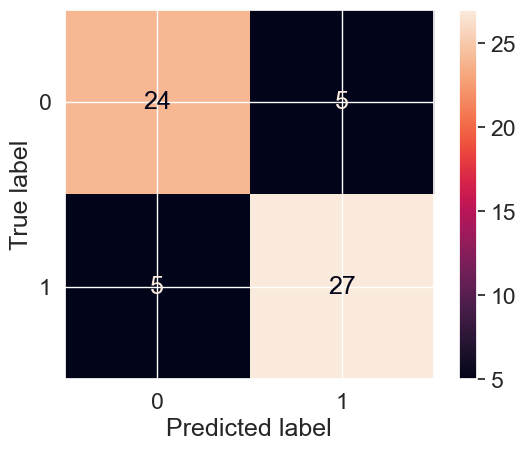

In [39]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                        y_pred= y_preds,
                                       cmap = "rocket",
                                       colorbar=True);

##### Classification Report

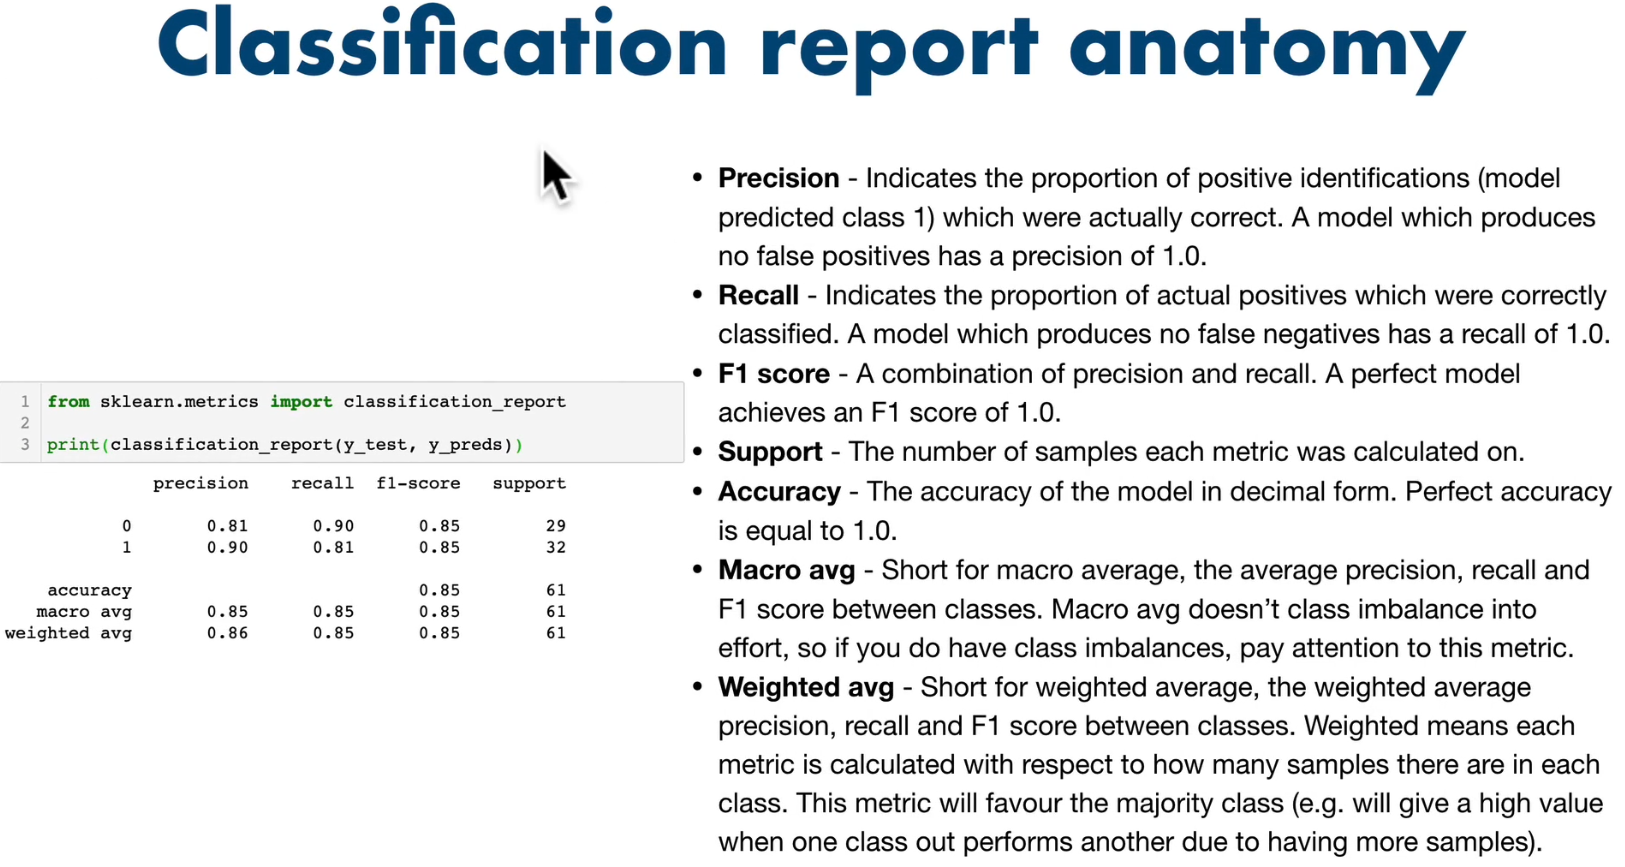

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [42]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds= np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

C:\Users\Phuong Ta\desktop\ml-course\exercise_ds\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Phuong Ta\desktop\ml-course\exercise_ds\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Phuong Ta\desktop\ml-course\exercise_ds\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
* **Accuracy** is good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* **Precision** and **Recall** become more important when classes are imbalanced.
    * if `False Positive` predictions are `worse` than `False Negative`, aim for `higher Precision`.
    * If `False Negative` predictions are `worse` than `False Positive`, aim for `higher Recall`.
* **F1-score** is a combination of Precision and Recall.

#### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 

The ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.  For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [11]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
model.score(X_test, y_test)

0.8065734772187598

In [13]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [15]:
y_test.mean()

2.0550030959302323

In [16]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [17]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [18]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [19]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [20]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [21]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [22]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073664

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [23]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [24]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [25]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [27]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16 # increase "squared_differences" for 1 sample

In [28]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [29]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.2573437523766412

In [30]:
# Artificially increase error in "squared_differences" column for ~100 samples
df_large_error.iloc[1:100, 3] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,20.000000
15663,5.00001,4.928596,-0.071414,20.000000
20484,2.18600,2.543160,0.357160,20.000000
9814,2.78000,2.331760,-0.448240,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [31]:
# Calculate MSE with large error(s)
df_large_error["squared_differences"].mean()

0.7334180712088106

#### 4.2.3 Finally using the `scoring` parameter

Read more -https://scikit-learn.org/stable/modules/model_evaluation.html

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y= heart_disease.target

clf = RandomForestClassifier(n_estimators=100)

In [35]:
np.random.seed(42)


# Cross-validation Accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) 
# if scoring=None, esitmator's default scoring evaulation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [36]:
# Cross-validated accuracy
print(f"The cross-validated Accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated Accuracy is: 82.48%


In [37]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy") 
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [38]:
# Cross-validated accuracy
print(f"The cross-validated Accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated Accuracy is: 82.48%


In [40]:
# Precision
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision") 
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [47]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision):.3f}")

The cross-validated precision is: 0.833


In [43]:
# Recall
np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall") 
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [48]:
# Cross-validated Recall
print(f"The cross-validated precision is: {np.mean(cv_recall):.3f}")

The cross-validated precision is: 0.855


Let's see the `scoring` parameter being using for a regression problem... 

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df.target

model = RandomForestRegressor(n_estimators=100)

In [50]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

For the most common use cases, you can designate a scorer object with the scoring parameter; the table below shows all possible values. All scorer objects follow the convention that `higher return values are better than lower return values`. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric

In [56]:
# Mean Squared Error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.43077628278916846

In [57]:
cv_mse

array([-0.52221069, -0.34450718, -0.37230252, -0.44813527, -0.46672576])

In [55]:
# Mean Absolute Error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-0.5381511 , -0.40533952, -0.43939147, -0.46016831, -0.47431639])

In [58]:
np.mean(cv_mae)

-0.46347335611434115

### 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
# Create X & y
X, y = heart_disease.drop("target", axis=1),heart_disease.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Create model and fit with data train
clf = RandomForestClassifier().fit(X_train,y_train)

# Predict
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy score: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision score: {precision_score(y_test, y_preds)}")
print(f"Recall score: {recall_score(y_test, y_preds)}")
print(f"F1 score: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy score: 83.61%
Precision score: 0.84375
Recall score: 0.84375
F1 score: 0.84375


In [33]:
housing_df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
# Create X, y
X= housing_df.drop("target", axis =1)
y= housing_df.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Create and fit model
rrg = RandomForestRegressor().fit(X_train, y_train)

# predict model
y_preds = rrg.predict(X_test)

# Evaluate model using evaluating functions

print("Regression metrics on the test set")
print(f"R_squared score: {r2_score(y_test, y_preds)*100:.2f}%")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_preds)}")


Regression metrics on the test set
R_squared score: 80.51%
Mean Absolute Error: 0.32754256845930246
Mean Squared Error: 0.2553684927247781


## 5. Improving a model

First predictions = base predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperarameters vs. Parameters:
* Parameters = mdel find these pattern in data
* Hyperparameter = settings on a models you can adjust to (potentially) improve its ability to find patterns.

Three ways to adjust Hyperarameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

